# Example ODE Approx Python Workflow


In [1]:
from approximation import ODE_approx
from numerical_methods import forward_euler_h

import matplotlib.pyplot as plt
import numpy as np

Assume differential equation
$$\{ x' = f(t, x) \& t \le T \}$$
is given as a python function f and T is a python variable. L and M are the maximum magnitude of the first and second derivative of the function F over the time range and are also given as a python variable.

The following example corresponds to the differential equation
$$\{ x' = -x \& t \le 1 \}$$
where $t' = 1$ is considered implicitly in the differential equation. 

In [9]:
def f(t, x):
      return -2*x
def x_actual(x0, t):
      return x0*np.exp(-2*t)
M = 4
L = 2
T = 1
# if we want to ensure that the error is within epsilon, we can calculate the timestep h 
# however, to better see the linear interpolation, we will manually set a large h
# eps = 0.1
# h = forward_euler_h(M, L, T, eps)
# f_approx_fn = ODE_approx(f, 1, M, L, T, eps=eps)
h = 0.2
f_approx_fn = ODE_approx(f, 1, M, L, T, h=h)

Sample x_actual [denoting the actual solution to the differential equation] and f_approx_fn for a given time and given initial value. The following demonstrates the syntax of the resulting approximating function which is in general of the form ODE_approx_fn(list_of_initial_values, time).

In [12]:
x0 = 10
t0 = 0.5
print("h forward_euler: ", forward_euler_h(M, L, T, 0.1))
print("h: ", h)
print("x_actual: ", x_actual(x0, t0))
print("x_approx: ", f_approx_fn([x0], t0))

h forward_euler:  0.014007454012720095
h:  0.2
x_actual:  3.6787944117144233
x_approx:  [array(2.88)]


Plot the x_actual function and the function found via linear interpolation for a fine grid of time to visualize the error of the approximation.

0.8793009304423385


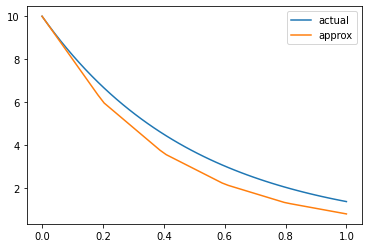

In [11]:
tt = np.linspace(0, T)
xx_actual = [x_actual(x0, t) for t in tt]
xx_approx = [f_approx_fn([x0], t)[0] for t in tt]
plt.plot(tt, xx_actual, label="actual")
plt.plot(tt, xx_approx, label="approx")
plt.legend()
print(max(abs(np.array(xx_actual)-np.array(xx_approx))))